In [1626]:
import pandas as pd
from sklearn import linear_model
import sklearn
import numpy as np
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [1703]:
from sklearn.model_selection import cross_val_score, cross_validate

# We have 2 variants how to choose data set
- dont use import as feature and extract it from estimated value of generation
- select import as feature and check ourselves: if import coefficient is ~1 then model is appropriate

In [1704]:
#extract data with import
x = pd.read_excel('generation_features.xlsx', sheet_name = 'x_import') 
y = pd.read_excel('generation.xlsx', sheet_name = 'full_generation')

In [1705]:
#extract data without import
#x = pd.read_excel('generation_features.xlsx', sheet_name = 'x_gen') 
#y = pd.read_excel('generation.xlsx', sheet_name = 'generation_without_import')

In [1706]:
y

,oblast,generation
0,Cherkaska,12.809762
1,Chernihivska,10.401013
2,Chernivetska,5.204956
3,Dnipropetrovska,91.600460
4,Donetska,45.276027
5,Ivano-Frankivska,12.416437
6,Kharkivska,43.015506
7,Khersonska,12.936792
8,Khmelnytska,17.771067
9,Kirovohradska,15.682634


In [1707]:
x

,oblast,Grain,Other crop,Mining industry,Other Industry,Petroleum Products,Mineral products,Metallurgy,Animal Husbandry,Waste,Population,GDP,Import
0,Cherkaska,4.6440,3.1014,0.323161,2.282224,0.000000,0.131885,0.069174,0.849030,1.48460,1.206351,20.217,0.000000
1,Chernihivska,0.5864,1.3697,2.344884,1.008002,0.000000,0.057278,0.040707,0.331131,0.30800,0.904374,18.693,1.735402
2,Chernivetska,4.9095,2.8047,0.069256,0.158049,0.000000,0.058606,0.012840,0.584315,0.71740,1.005745,10.671,0.398317
3,Dnipropetrovska,3.4875,3.0439,73.993718,2.738703,0.539605,0.953764,12.385788,0.587331,243.59880,3.206477,32.896,0.000000
4,Donetska,1.3444,1.2881,32.936292,0.779895,1.351476,0.314570,9.329018,0.311122,24.11020,4.165901,13.347,1.005068
5,Ivano-Frankivska,0.8045,1.5432,3.771917,1.714701,0.000000,0.390537,0.034493,0.549479,1.96980,1.373252,15.684,0.000000
6,Kharkivska,3.8292,4.0382,31.220013,2.410226,0.286363,0.580865,0.460805,0.641169,1.62850,2.675598,23.533,22.273247
7,Khersonska,2.2677,2.9676,0.064366,0.767247,0.000000,0.118045,0.056724,0.383283,0.39250,1.037640,15.420,0.566603
8,Khmelnytska,3.8610,4.5393,0.370720,0.649810,0.000000,0.392310,0.160705,0.751552,0.90050,1.264705,16.904,0.000000
9,Kirovohradska,3.7632,3.0477,1.266708,0.594425,0.000000,0.064708,0.221805,0.386273,37.90200,0.945549,18.688,0.000000


Grain
0.21781344727325397


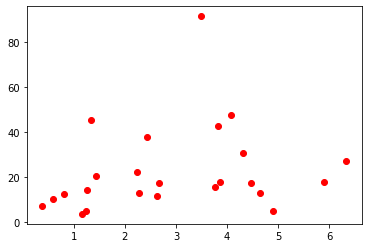

Other crop
0.20548507680873063


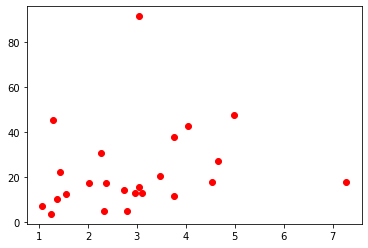

Mining industry
0.7900171017497318


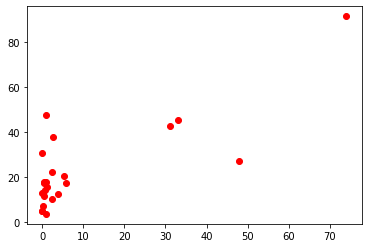

Other Industry
0.5044397178251241


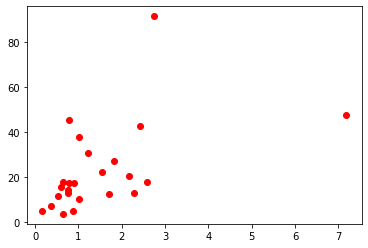

Petroleum Products
0.4436044859474493


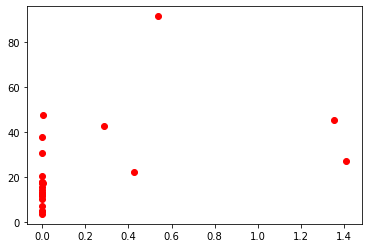

Mineral  products
0.6474937769214021


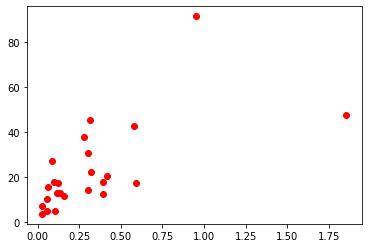

Metallurgy
0.7599399267857171


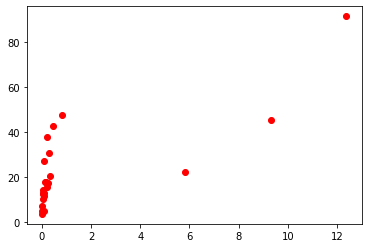

Animal Husbandry
0.16639236980496758


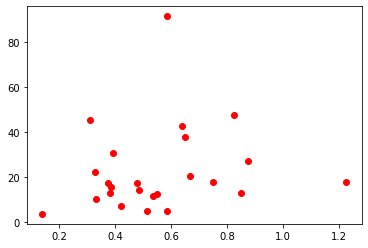

Waste
0.772099108642608


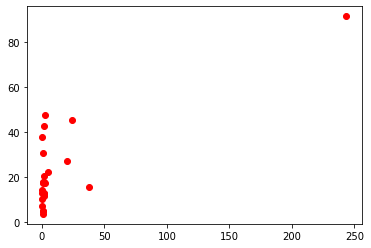

Population
0.6965551724129544


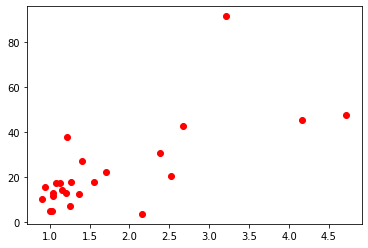

GDP
0.6394480581408102


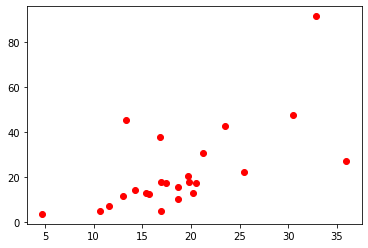

Import
0.2073575761395971


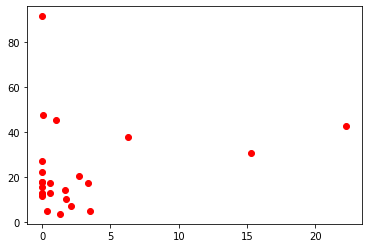

In [1709]:
for i in x.columns[1:]:
    print(i)
    print(np.corrcoef(x[i],y['generation'])[0][1])
    plt.plot(x[i], y['generation'], 'ro')
    plt.show()

In [1710]:
y_np = y.to_numpy()[:, 1:]
x_np = x.to_numpy()[:, 1:]

### Linear regression positive coefficients with zero intercept estimation using k-fold cross validation

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [1711]:
#l1 regularization (finding important features)
clf = linear_model.Lasso(alpha = 0.05, positive = True, fit_intercept = False)

In [1712]:
#regular linear regression
#clf = linear_model.LinearRegression(positive = True, fit_intercept = False)

##  Models scores for choosing the best model
### We will choose the best model based on the least test R2 statistics and analysis of selected features

In [1713]:
scores = cross_validate(clf, x_np, y_np[:, 0], cv=7,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True, return_estimator=True)
models_scores = pd.concat([pd.DataFrame(['model ' + str(i) for i in range(7)]),
           pd.DataFrame(list(zip(scores['test_r2'], scores['train_r2']))),
           pd.DataFrame(list(zip(scores['train_neg_mean_squared_error'], scores['test_neg_mean_squared_error'])))], axis = 1)
models_scores.columns = ['model_index', 'test_r2', 'train_r2', 'train_MSE', 'test_MSE']
models_scores

,model_index,test_r2,train_r2,train_MSE,test_MSE
0,model 0,0.984771,0.877066,-20.258071,-19.375633
1,model 1,0.607785,0.958228,-15.642292,-97.367118
2,model 2,0.979620,0.943448,-21.416801,-5.321595
3,model 3,0.823733,0.949031,-20.719505,-5.580774
4,model 4,0.200960,0.951121,-19.804528,-23.627303
5,model 5,-1.246491,0.958381,-16.064407,-61.383819
6,model 6,0.024199,0.988057,-4.636016,-156.044080


## Models coeffs for features

In [1714]:
models_coeffs = pd.DataFrame(x.columns[1:])
for model in scores['estimator']:
    models_coeffs = pd.concat([models_coeffs, pd.DataFrame(list(model.coef_))], axis = 1)
models_coeffs.columns = ['features'] + ['model ' + str(i) for i in range(7)]
models_coeffs

,features,model 0,model 1,model 2,model 3,model 4,model 5,model 6
0,Grain,0.238878,0.000000,0.000000,0.000000,0.000000,0.000000,0.584027
1,Other crop,2.299077,2.247167,2.098683,2.218096,2.328707,3.260662,0.702486
2,Mining industry,0.033966,0.236458,0.044669,0.177174,0.000000,0.000000,0.114619
3,Other Industry,0.000000,0.000000,0.000000,0.000000,0.000000,0.459811,0.590988
4,Petroleum Products,4.289872,0.000000,3.548532,0.050368,1.788955,3.820027,0.000000
5,Mineral products,16.213438,17.408208,12.708773,15.344255,15.889318,12.607370,13.415708
6,Metallurgy,2.238386,1.837900,2.053020,2.428084,2.617975,2.548003,2.996999
7,Animal Husbandry,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Waste,0.165589,0.107607,0.145009,0.091966,0.136183,0.137774,0.074096
9,Population,0.304226,0.000000,1.125901,0.326391,0.553599,0.000000,0.147904


In [1715]:
def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return ['background-color: yellow' if is_max.any() else '' for v in is_max]

best_model_coefficients = models_coeffs[['features', 'model 0']]
best_model_coefficients.columns = ['feature', 'weight']
best_model_coefficients['weight'].astype('float')

 

best_model_coefficients.style.apply(highlight_greaterthan, threshold=0.0001, column=['weight'], axis=1)

,feature,weight
0,Grain,0.238878
1,Other crop,2.299077
2,Mining industry,0.033966
3,Other Industry,0.000000
4,Petroleum Products,4.289872
5,Mineral products,16.213438
6,Metallurgy,2.238386
7,Animal Husbandry,0.000000
8,Waste,0.165589
9,Population,0.304226


In [1718]:
model =  scores['estimator'][0]
df = pd.concat([pd.DataFrame(model.predict(x_np), columns = ['Predicted']), pd.DataFrame(y_np[:, 0], columns = ['Measured']).astype(float)], axis = 1)
df['oblast'] = y['oblast']
df['diff'] = abs(df['Predicted'] - df['Measured'])
df['percent'] = df['diff']/df['Measured']
print('sum of ablolute difference', df['diff'].sum())
#list(zip(x.columns[1:], model.coef_))

sum of ablolute difference 70.00623150017643


# Results of built model

#### Measured and predicted attraction comparison

In [1717]:
df

,Predicted,Measured,oblast,diff,percent
0,11.859214,12.809762,Cherkaska,0.950548,0.074205
1,7.168689,10.401013,Chernihivska,3.232325,0.310770
2,9.812032,5.204956,Chernivetska,4.607076,0.885132
3,98.303140,91.600460,Dnipropetrovska,6.702680,0.073173
4,42.949754,45.276027,Donetska,2.326273,0.051380
5,11.566368,12.416437,Ivano-Frankivska,0.850069,0.068463
6,47.997247,43.015506,Kharkivska,4.981742,0.115813
7,10.913176,12.936792,Khersonska,2.023616,0.156423
8,19.212801,17.771067,Khmelnytska,1.441734,0.081128
9,16.707716,15.682634,Kirovohradska,1.025082,0.065364


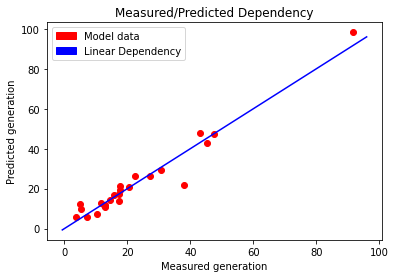

In [1674]:
plt.plot(df['Measured'], df['Predicted'], 'ro')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, 'b-')
plt.xlabel('Measured generation')
plt.ylabel('Predicted generation')
plt.title('Measured/Predicted Dependency')
red_patch = mpatches.Patch(color='red', label='Model data')
blue_patch = mpatches.Patch(color='blue', label='Linear Dependency')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

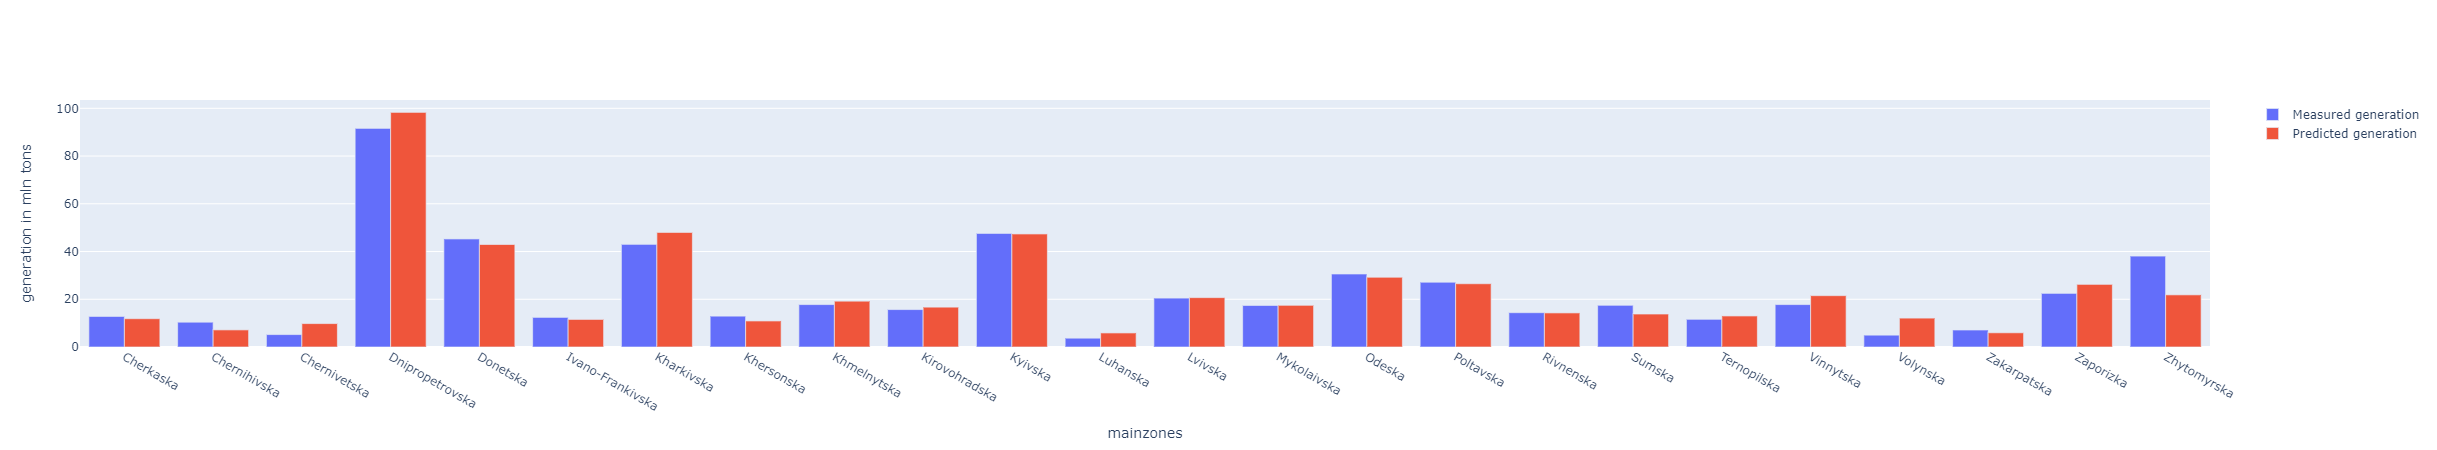

In [1675]:
histogram = go.Figure(
            data=[ go.Bar(name='Measured generation',x=df['oblast'], y=df['Measured']),
                  go.Bar(name='Predicted generation',x=df['oblast'], y=df['Predicted'])])
histogram.update_layout(barmode='group',
    xaxis_title_text = 'mainzones', # xaxis label
    yaxis_title_text = 'generation in mln tons', # yaxis label                   
    )
histogram.show()

Text(0.5, 1.0, 'Correlation Heatmap')

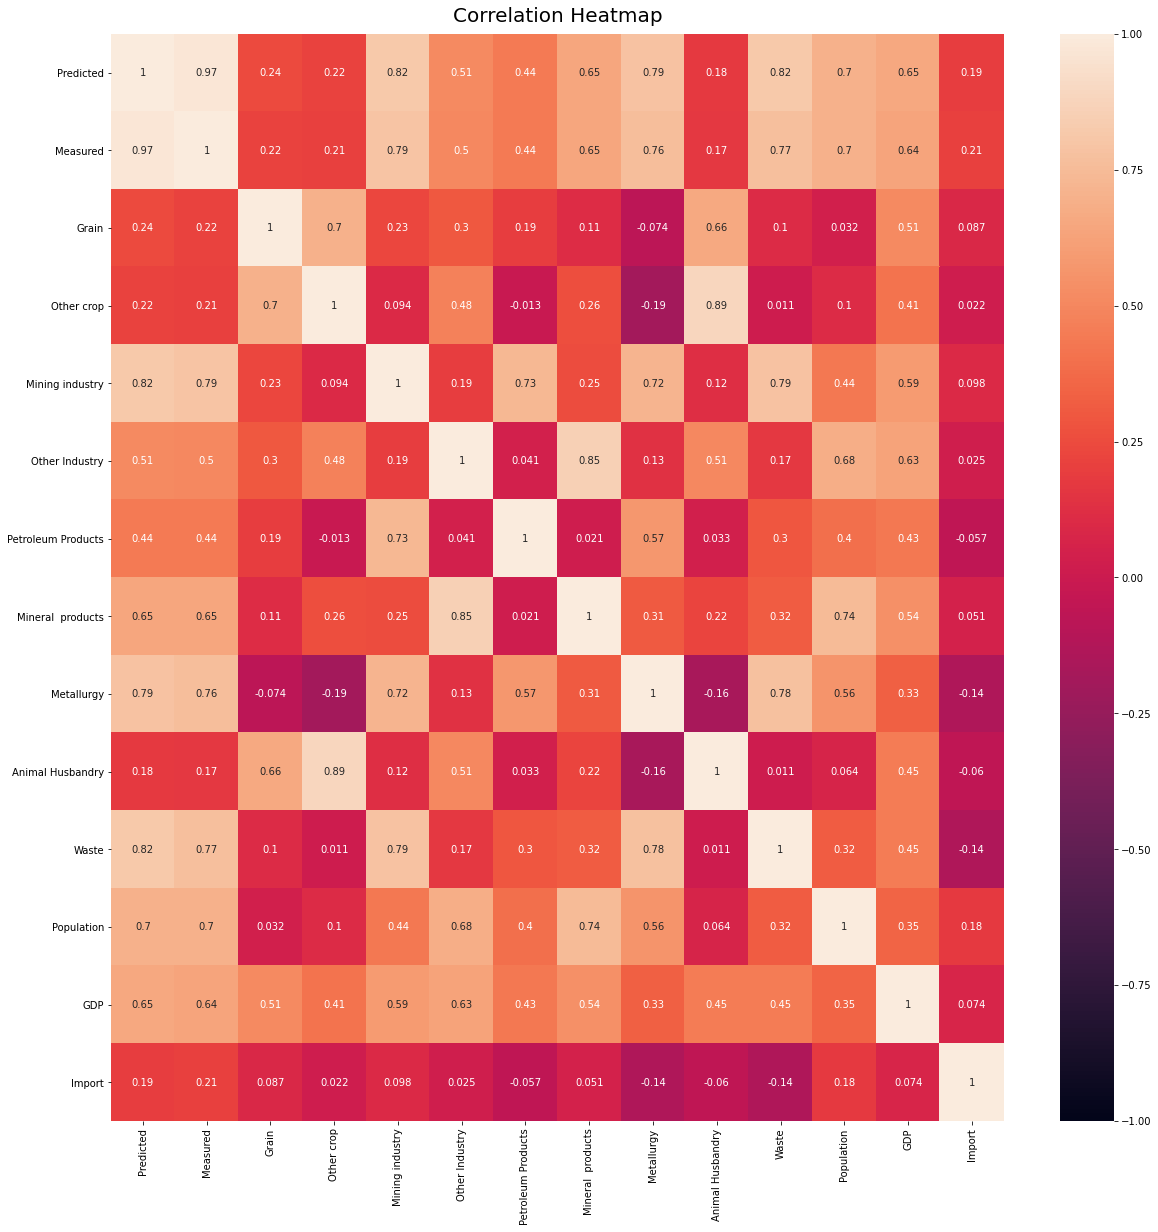

In [1684]:
new_x = x.drop(columns =['oblast'])

df2 = pd.concat( [df[['Predicted', 'Measured']], new_x], axis = 1)

plt.figure(figsize = (20,20))

heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)